In [49]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

Pushshift scraping

In [6]:
pushshift_scraper_df = pd.read_csv("/Users/osama/Documents/finalNlu/data/pushshiftScraping/posts_ids_and_scores.csv")

In [7]:
pushshift_scraper_df.head(1)

,id,timestamp,score
0,1fy0bx,1370724175,2


In [8]:
len(pushshift_scraper_df)

1605213

Praw scraping (atleast 2 comments for post)

In [10]:
praw_scraper_df = pd.read_csv("/Users/osama/Documents/finalNlu/data/mergeScrapedData/full_dataset.csv")

In [19]:
praw_scraper_df['verdict'].value_counts()

Not the A-hole       299888
Asshole               88596
No A-holes here       39962
Everyone Sucks        24055
Not enough info        9740
                      ...  
Move on                   1
Lesser Asshole            1
META Asshole              1
**NEW** META              1
Justified Asshole         1
Name: verdict, Length: 184, dtype: int64

In [11]:
praw_scraper_df.head(1)

,id,title,text,edited,verdict,comment1,comment2,comment3,comment4,comment5,comment6,comment7,comment8,comment9,comment10,score,url,time_created
0,4pcrle,AITA for wanting to celebrate my birthday,I turned 30 on Monday. I don't have a problem ...,False,not the a-hole,"I think you know your NTA, it seems like you j...",Definitely NTA. I suffer from depression and a...,The person who commented above is correct. You...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,https://www.reddit.com/r/AmItheAsshole/comment...,1.466626e+09


In [12]:
len(praw_scraper_df)

817660

Processed dataset (removed empty posts)

In [24]:
pre_processed_df = pd.read_csv("/Users/osama/Documents/finalNlu/data/dataPreProcessing/pre_processed_dataset.csv")

In [25]:
pre_processed_df['verdict'].value_counts()

Not the A-hole     224531
Asshole             60629
No A-holes here     27747
Everyone Sucks      16089
not the a-hole        289
asshole                55
everyone sucks          9
Name: verdict, dtype: int64

In [26]:
pre_processed_df.head(1)

,id,title,text,edited,verdict,comment1,comment2,comment3,comment4,comment5,comment6,comment7,comment8,comment9,comment10,score,url,time_created
0,4pcrle,AITA for wanting to celebrate my birthday,I turned 30 on Monday. I don't have a problem ...,False,not the a-hole,"I think you know your NTA, it seems like you j...",Definitely NTA. I suffer from depression and a...,The person who commented above is correct. You...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,https://www.reddit.com/r/AmItheAsshole/comment...,1.466626e+09


In [27]:
len(pre_processed_df)

329349

Data cleaning (remove newline characters, remove extra columns, remove edit and update sections...)

In [28]:
cleaned_df = pd.read_csv("/Users/osama/Documents/finalNlu/data/dataCleaning/cleaned_dataset.csv")

In [35]:
cleaned_df.head(1)

,id,title,text,verdict,comment1,comment2,score
0,4pcrle,aita for wanting to celebrate my birthday,i turned 30 on monday. i don't have a problem ...,nta,"i think you know your nta, it seems like you j...",definitely nta. i suffer from depression and a...,15


In [36]:
len(cleaned_df)

270709

In [33]:
counts = cleaned_df['verdict'].value_counts()
verdict = counts.index.to_list()
freq = counts.to_list()
freq_df = pd.DataFrame(list(zip(verdict, freq)), 
               columns =['Verdict', 'Frequency']) 
freq_df['Verdict'] = freq_df['Verdict'].str.title()
freq_df.head()

,Verdict,Frequency
0,Nta,203079
1,Yta,47408
2,Nah,13342
3,Esh,6880


([<matplotlib.axis.XTick at 0x6886f4520>,
 [Text(0, 0, 'NTA'), Text(1, 0, 'YTA'), Text(2, 0, 'NAH'), Text(3, 0, 'ESH')])

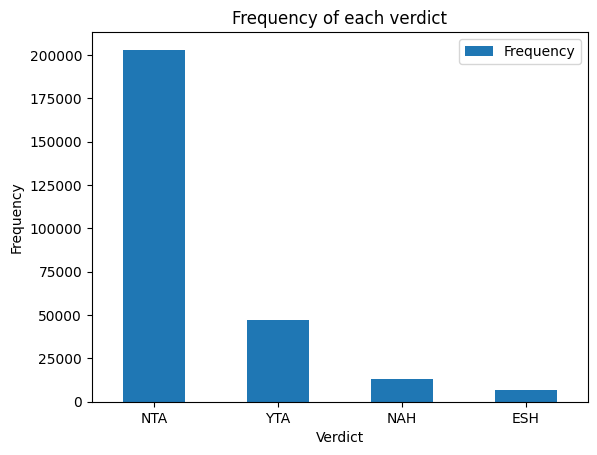

In [34]:
freq_df.plot(kind="bar", title="test")
plt.title("Frequency of each verdict")
plt.xlabel("Verdict")
plt.ylabel("Frequency")
plt.xticks(range(4), ["NTA", "YTA", "NAH", "ESH"], rotation=0)

Combined NTA and NAH, YTA and ESH

In [41]:
counts = cleaned_df['verdict'].value_counts()
verdict = ["0", "1"]
freq = [counts['nta'] + counts['nah'], counts['yta'] + counts['esh']] 
freq_df = pd.DataFrame(list(zip(verdict, freq)), 
               columns =['Verdict', 'Frequency']) 
freq_df['Verdict'] = freq_df['Verdict'].str.title()
freq_df.head()

,Verdict,Frequency
0,0,216421
1,1,54288


([<matplotlib.axis.XTick at 0x68baae850>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

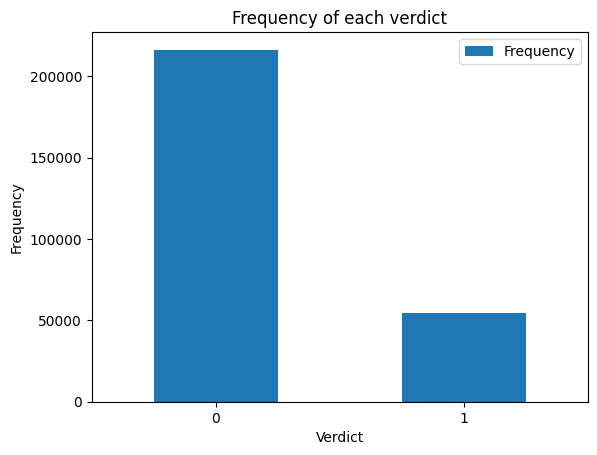

In [42]:
freq_df.plot(kind="bar", title="test")
plt.title("Frequency of each verdict")
plt.xlabel("Verdict")
plt.ylabel("Frequency")
plt.xticks(range(2), ["0", "1"], rotation=0)

In [43]:
#find the total number of words in post text
cleaned_df['totalwords'] = cleaned_df['text'].str.split().str.len()
cleaned_df['totalwords'].describe()

count    270709.000000
mean        358.469966
std         165.335021
min           5.000000
25%         231.000000
50%         343.000000
75%         483.000000
max        5507.000000
Name: totalwords, dtype: float64

In [46]:
#find the total number of words in post title
cleaned_df['totalwords'] = cleaned_df['title'].str.split().str.len()
cleaned_df['totalwords'].describe()

count    270709.000000
mean         11.813630
std           4.698614
min           1.000000
25%           9.000000
50%          11.000000
75%          14.000000
max          64.000000
Name: totalwords, dtype: float64

In [47]:
#find the total number of words in post comment 1
cleaned_df['totalwords'] = cleaned_df['comment1'].str.split().str.len()
cleaned_df['totalwords'].describe()

count    270709.000000
mean         51.400955
std          45.343761
min           1.000000
25%          23.000000
50%          39.000000
75%          65.000000
max        1113.000000
Name: totalwords, dtype: float64

In [48]:
#find the total number of words in post comment 2 
cleaned_df['totalwords'] = cleaned_df['comment2'].str.split().str.len()
cleaned_df['totalwords'].describe()

count    270709.000000
mean         53.523064
std          47.727248
min           1.000000
25%          23.000000
50%          41.000000
75%          68.000000
max        1254.000000
Name: totalwords, dtype: float64

In [54]:
# Count most frequent 100 words from sentences in all verdicts
Counter(" ".join(cleaned_df["text"]).split()).most_common(10)

[('i', 4105691),
 ('and', 3425302),
 ('to', 3176529),
 ('the', 2699971),
 ('my', 2144238),
 ('a', 2059704),
 ('that', 1282586),
 ('she', 1239962),
 ('of', 1221983),
 ('was', 1158379)]

In [55]:
#Count most frequent 100 words from sentences in  Asshole Verdict
AssholeFreq = ["yta","esh"]
df_ass = cleaned_df[cleaned_df['verdict'].isin(AssholeFreq)]
Counter(" ".join(df_ass['text']).split()).most_common(10)

[('i', 762692),
 ('and', 630611),
 ('to', 570518),
 ('the', 509273),
 ('a', 391466),
 ('my', 351338),
 ('she', 256803),
 ('that', 244554),
 ('of', 229193),
 ('was', 225149)]

In [56]:
#Count most frequent 100 words from sentences in not Asshole Verdict
NotAssFreq =  ["nta","nah"]
df_not = cleaned_df[cleaned_df['verdict'].isin(NotAssFreq)]
Counter(" ".join(df_ass['text']).split()).most_common(10)


[('i', 762692),
 ('and', 630611),
 ('to', 570518),
 ('the', 509273),
 ('a', 391466),
 ('my', 351338),
 ('she', 256803),
 ('that', 244554),
 ('of', 229193),
 ('was', 225149)]

In [61]:
#Count most frequent 100 words from comments in  Asshole Verdict
AssholeFreq = ["yta","esh"]
df_ass = cleaned_df[cleaned_df['verdict'].isin(AssholeFreq)]
Counter(" ".join(df_ass['comment1']).split()).most_common(10)

[('you', 138811),
 ('to', 119549),
 ('the', 83864),
 ('and', 82502),
 ('a', 76968),
 ('your', 68442),
 ('that', 42325),
 ('of', 42283),
 ('is', 41408),
 ('for', 40789)]

In [62]:
#Count most frequent 100 words from comments in not Asshole Verdict
NotAssFreq =  ["nta","nah"]
df_not = cleaned_df[cleaned_df['verdict'].isin(NotAssFreq)]
Counter(" ".join(df_not['comment1']).split()).most_common(10)

[('to', 391599),
 ('you', 366938),
 ('the', 262389),
 ('and', 261422),
 ('your', 234779),
 ('a', 230995),
 ('is', 144940),
 ('that', 130753),
 ('of', 125380),
 ('for', 124353)]

In [63]:
#Count most frequent 100 words from title in not Asshole Verdict
NotAssFreq =  ["nta","nah"]
df_not = cleaned_df[cleaned_df['verdict'].isin(NotAssFreq)]
Counter(" ".join(df_not['title']).split()).most_common(10)

[('for', 214526),
 ('my', 196316),
 ('aita', 181707),
 ('to', 102755),
 ('a', 63430),
 ('not', 56869),
 ('i', 46509),
 ('the', 33478),
 ('wibta', 28618),
 ('with', 25313)]

In [64]:
#Count most frequent 100 words from title in  Asshole Verdict
AssholeFreq = ["yta","esh"]
df_ass = cleaned_df[cleaned_df['verdict'].isin(AssholeFreq)]
Counter(" ".join(df_ass['title']).split()).most_common(10)

[('for', 55234),
 ('aita', 47224),
 ('my', 46383),
 ('to', 23740),
 ('a', 18866),
 ('i', 11349),
 ('not', 9952),
 ('the', 9600),
 ('telling', 6533),
 ('of', 6053)]